## PA3
Lukas Hén & Ida Åberg
Group 12

##### Step 1
Most of the tweets task in PA3a were easy to label and we both agreed on the label, however some of the tweets were ambigious and hard to label. In some of these cases we labeled the tweet differently. A way to improve the labeling would be clear defintions of the labeling criterias in order to help in ambigous cases. Another would be to add another person in the labeling in order to and taking the average of what all the labelers annotated.


In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
from torch.optim import AdamW
from transformers import BertTokenizer, BertModel, get_linear_schedule_with_warmup
from transformers import DistilBertModel, DistilBertTokenizer, AutoTokenizer, DistilBertForSequenceClassification, ModernBertModel, ModernBertForSequenceClassification
from tqdm import tqdm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
train_data = pd.read_csv("content/gold_train.csv",  sep="\t", quotechar='"', engine="python")
test_data = pd.read_csv("content/test.csv",  sep="\t", quotechar='"', engine="python")
train_data_shuffled = train_data.sample(frac=1.0, random_state=0)
test_data_shuffled = test_data.sample(frac=1.0, random_state=0)
selected_cols = ["text", "sentiment"]
train_data = train_data[selected_cols].dropna()
test_data = test_data[selected_cols].dropna()

gold_labels = train_data["sentiment"]

print(train_data[['sentiment', 'text']].head())

print(gold_labels)

  sentiment                                               text
0   neutral  There's so much misconception on Islam rn so s...
1   neutral  @Mr_Rondeau You should try Iron Maiden at abou...
2   neutral  Going to #FantasticFour tomorrow. Half expecti...
3   neutral  @cfelan hey hey, just checkng to see if you or...
4   neutral  does anyone just get drunk and watch twilight ...
0         neutral
1         neutral
2         neutral
3         neutral
4         neutral
           ...   
10671    positive
10672    positive
10673    negative
10674    negative
10675     neutral
Name: sentiment, Length: 10676, dtype: object


In [ ]:
# # Uncomment this block to use the crowdsourced dataset

# train_data = pd.read_csv("content/crowdsourced_train.csv",  sep="\t", quotechar='"', engine="python")
# test_data = pd.read_csv("content/test.csv",  sep="\t", quotechar='"', engine="python")
# train_data_shuffled = train_data.sample(frac=1.0, random_state=0)
# test_data_shuffled = test_data.sample(frac=1.0, random_state=0)
# selected_cols = ["text", "sentiment"]
# train_data = train_data[selected_cols].dropna()
# test_data = test_data[selected_cols].dropna()

# crowd_labels = train_data["sentiment"]

# print(train_data[['sentiment', 'text']].head())

  sentiment                                               text
0  Positive  There's so much misconception on Islam rn so s...
1  Positive  @Mr_Rondeau You should try Iron Maiden at abou...
2  Negative  Going to #FantasticFour tomorrow. Half expecti...
3   Neutral  @cfelan hey hey, just checkng to see if you or...
4  Positive  does anyone just get drunk and watch twilight ...


In [4]:
## Code for adding additonal data to the dataset

# data = pd.read_csv('content/Tweets.csv',  sep=",", quotechar='"', engine="python")
# #data['target'] = data['target'].map({0: 0, 2: 1, 4: 2})

# selected_cols = ["sentiment", "text"]
# data = data[selected_cols].dropna()
# train_data = pd.concat([train_data, data])
# train_data = train_data.sample(frac=1, random_state=42)
# train_data = train_data.reset_index(drop=True)
# train_data.head()

### Step 2 

Some of the labels in the crowdsourced dataset were missspelled. By printing unique labels in the dataset and then matching those to a corrections dictionary we are able to clean these up.

In [5]:
def clean_tweet(text):
    text = re.sub(r"http\S+", "", text)                   # Remove URLs
    text = re.sub(r"@\w+", "", text)                      # Remove mentions
    text = re.sub(r"#\w+", "", text)                      # Remove hashtags
    text = re.sub(r"\s+", " ", text)                      # Remove extra spaces
    text = re.sub(r"[^\w\s.,!?']", "", text)              # Remove special characters except punctuation
    return text.strip().lower()

def clean_sentiment(label):
    label = label.strip().lower()

    corrections = {
        'positive': 'positive',
        'netural' : 'neutral',
        'netural' : 'neutral',
        'neutrla' : 'neutral',
        'neutal' : 'neutral',
        'neugral' : 'neutral',
        'netutral' : 'neutral',
        'neutrall' : 'neutral',
        'neutral?' : 'neutral',
        '_x0008_neutral' : 'neutral',
        'neutra l' : 'neutral',
        'nuetral' : 'neutral',
        'nutral' : 'neutral',
        'neural' : 'neutral',
        'negtaive' : 'negative',
        'negayive' : 'negative',
        'nedative' : 'negative',
        'postive' : 'positive',
        'positie' : 'positive',
        'positve' : 'positive',
        'postitive' : 'positive',
        'npositive' : 'positive'
        
    }

    return corrections.get(label, label)  # Returns None if not found

#train_data_shuffled["clean_text"] = train_data["text"].astype(str).apply(clean_tweet)
train_data["clean_text"] = train_data["text"].astype(str).apply(clean_tweet)
test_data_shuffled["clean_text"] = test_data["text"].astype(str).apply(clean_tweet)
#train_data_shuffled["clean_sentiment"] = train_data["sentiment"].astype(str).apply(clean_sentiment)
#train_data_shuffled["clean_sentiment"] = train_data["target"].astype(str).apply(clean_sentiment)
train_data["clean_sentiment"] = train_data["sentiment"].astype(str).apply(clean_sentiment)

#print(train_data_shuffled[['sentiment', 'clean_text']].head())

In [6]:
# Code for calculating the agreement of the datasets
from sklearn.metrics import accuracy_score, cohen_kappa_score

if crowd_labels.any() and gold_labels.any():
    gold_labels= gold_labels.astype(str).apply(clean_sentiment)
    crowd_labels = crowd_labels.astype(str).apply(clean_sentiment)

    accuracy = accuracy_score(gold_labels, crowd_labels)
    kappa = cohen_kappa_score(gold_labels, crowd_labels)

    print(f"Accuracy: {accuracy:.2f}")
    print(f"Cohen's Kappa: {kappa:.2f}")
    print(gold_labels.value_counts())
    print(crowd_labels.value_counts())


Accuracy: 0.65
Cohen's Kappa: 0.45
sentiment
neutral     5364
positive    3652
negative    1660
Name: count, dtype: int64
sentiment
neutral     5079
positive    3219
negative    2378
Name: count, dtype: int64


##### Agreement metrics
- Accuracy: 0.65
- Cohen's Kappa: 0.45

This indicates the dataset labeling agree too some extent but not fully, quickly inspecting the datasets this seems to be the case.


##### Class distrubution
Gold lables:
neutral     5364
positive    3652
negative    1660

Crowdsourced labels:
neutral     5079
positive    3219
negative    2378

Both the datasets roughly have the same class distrobution, however in the gold dataset the class imbalance is slightly larger as there are less negative c

In [7]:
Xtrain = train_data["clean_text"]
Ytrain = train_data['clean_sentiment']

Xtest = test_data_shuffled["clean_text"]
Ytest = test_data_shuffled['sentiment']

Xval, Xtest, Yval, Ytest = train_test_split(Xtest, Ytest, test_size=0.5, random_state=42) # Splits the test data into a test and validation set


In [8]:
# Used to clean the labels
print(Ytrain.unique()) 
print(Ytest.unique())

['positive' 'negative' 'neutral']
['negative' 'neutral' 'positive']


##### Step 3

Using the crowdsourced data, ModernBERT didn't get a higher validation accuracy than 66-67%, even across all the training epochs. Meanwhile using the gold-labeled set, an accuracy of 85-86% is achieved. The reason for this could be that the misslabeling of the data set makes the model unable to acquire the context of certain words if some of the labels contradicts themselves.

In [10]:
class TextClassificationDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length):
            self.texts = texts
            self.labels = labels
            self.tokenizer = tokenizer
            self.max_length = max_length
            self.label_map = {
            "negative": 0,
            "neutral": 1,
            "positive": 2,
            "0" : 0,
            "1" : 1,
            "2" : 2
        }
            
    def __len__(self):
        return len(self.texts)
    def __getitem__(self, idx):
        text = self.texts.iloc[idx]
        label_str = self.labels.iloc[idx]
        label = self.label_map.get(label_str, -1)
        
        if label == -1:
            raise ValueError(f"Invalid label at index {idx}: {self.labels[idx]}")
        
        encoding = self.tokenizer(text, return_tensors='pt', max_length=self.max_length, padding='max_length', truncation=True)
        return {'input_ids': encoding['input_ids'].flatten(), 'attention_mask': encoding['attention_mask'].flatten(), 'label': torch.tensor(label), 'text': text, 'index': idx}

In [ ]:
# Used in testing the baseline bert model

class BERTClassifier(nn.Module):
    def __init__(self, bert_model_name, num_classes):
        if bert_model_name == "bert-base-uncased":
            super(BERTClassifier, self).__init__()
            self.bert = BertModel.from_pretrained(bert_model_name)
            self.dropout = nn.Dropout(0.1)
            self.fc = nn.Linear(self.bert.config.hidden_size, num_classes)
            self.model = "bert"
        elif bert_model_name == "distilbert-base-uncased":
            super(BERTClassifier, self).__init__()
            self.bert = DistilBertModel.from_pretrained(bert_model_name)
            self.dropout = nn.Dropout(0.1)
            self.fc = nn.Linear(self.bert.config.hidden_size, num_classes)
            self.model = "distillbert"
        elif bert_model_name == "answerdotai/ModernBERT-base":
            super(BERTClassifier, self).__init__()
            self.bert = ModernBertModel.from_pretrained(bert_model_name)
            self.dropout = nn.Dropout(0.1)
            self.fc = nn.Linear(self.bert.config.hidden_size, num_classes)
            self.model = "answerdotai/ModernBERT-base"
        else: 
            raise Exception("Unkown model")

    def forward(self, input_ids, attention_mask):
            outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
            if self.model == "distillbert" or "answerdotai/ModernBERT-base":
                pooled_output = outputs.last_hidden_state[:, 0]
                
            else:
                pooled_output = outputs.pooler_output
            x = self.dropout(pooled_output)
            logits = self.fc(x)
            return logits

In [12]:
def train(model, data_loader, optimizer, scheduler, device):
    total_correct = 0
    total_samples = 0
    total_loss = 0
    model.train()
    for batch in tqdm(data_loader):
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        #loss = nn.CrossEntropyLoss()(outputs, labels)
        loss = outputs.loss
        total_loss += loss.item()
        
        preds = torch.argmax(outputs.logits, dim=-1)
        total_correct += (preds == labels).sum().item()
        total_samples += labels.size(0)
        
        loss.backward()
        optimizer.step()
        scheduler.step()
        
    epoch_train_accs = total_correct / total_samples
    train_loss = total_loss / len(data_loader)
        
    return epoch_train_accs, train_loss

In [13]:

def evaluate(model, data_loader, device):
    model.eval()
    predictions = []
    actual_labels = []
    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            preds = torch.argmax(logits, dim=-1)
            predictions.extend(preds.cpu().tolist())
            actual_labels.extend(labels.cpu().tolist())
            
            cm = confusion_matrix(actual_labels, predictions)
    return accuracy_score(actual_labels, predictions), classification_report(actual_labels, predictions, zero_division=0), cm


In [14]:
def predict_sentiment(text, model, tokenizer, device, max_length=128):
    model.eval()
    encoding = tokenizer(text, return_tensors='pt', max_length=max_length, padding='max_length', truncation=True)
    input_ids = encoding['input_ids'].to(device)
    attention_mask = encoding['attention_mask'].to(device)

    with torch.no_grad():
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            preds = torch.argmax(logits, dim=-1)
    if preds.item() == 0:
        return "negative"
    elif preds.item() == 1:
        return "neutral"
    else:
        return "positive"

# Maybe error here

In [ ]:
# Set up parameters
bert_model_name = 'answerdotai/ModernBERT-base' #"distilbert-base-uncased" 'bert-base-uncased' ## Load the model by providing the model name
num_classes = 3
max_length = 48
batch_size = 32
batch_size_val = batch_size
num_epochs = 8
warmup_steps = 30
learning_rate = 2e-5 # 3e-4: Andre Karpathy, 2e-5 from the guide

In [ ]:
# Loads tokenizer based on model
if bert_model_name == 'bert-base-uncased':
    tokenizer = BertTokenizer.from_pretrained(bert_model_name)
elif bert_model_name == 'distilbert-base-uncased':
     tokenizer = DistilBertTokenizer.from_pretrained(bert_model_name)
else:
    tokenizer = AutoTokenizer.from_pretrained(bert_model_name)

train_dataset = TextClassificationDataset(Xtrain, Ytrain, tokenizer, max_length)
val_dataset = TextClassificationDataset(Xval, Yval, tokenizer, max_length)
test_dataset = TextClassificationDataset(Xtest, Ytest, tokenizer, max_length)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size_val)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size_val)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
from transformers import AutoModelForSequenceClassification, BitsAndBytesConfig

#device = torch.device("cpu")
#model = BERTClassifier(bert_model_name, num_classes).to(device)
#model = ModernBertForSequenceClassification.from_pretrained("answerdotai/ModernBERT-base", num_labels=3).to(device)
model = AutoModelForSequenceClassification.from_pretrained(bert_model_name, num_labels=3).to(device)


Some weights of ModernBertForSequenceClassification were not initialized from the model checkpoint at answerdotai/ModernBERT-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
## Uncomment to reload the saved model
#model.load_state_dict(torch.load("bert_classifier.pth"))

In [19]:
optimizer = AdamW(model.parameters(), lr=learning_rate)
total_steps = len(train_dataloader) * num_epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=warmup_steps, num_training_steps=total_steps)

Epoch 1/8


100%|██████████| 334/334 [01:01<00:00,  5.40it/s]


Validation Accuracy: 0.6626
              precision    recall  f1-score   support

           0       0.64      0.54      0.58       536
           1       0.61      0.87      0.72      1304
           2       0.89      0.44      0.59       922

    accuracy                           0.66      2762
   macro avg       0.71      0.62      0.63      2762
weighted avg       0.71      0.66      0.65      2762

Epoch 2/8


100%|██████████| 334/334 [01:14<00:00,  4.46it/s]


Validation Accuracy: 0.6789
              precision    recall  f1-score   support

           0       0.55      0.76      0.64       536
           1       0.71      0.64      0.68      1304
           2       0.75      0.68      0.71       922

    accuracy                           0.68      2762
   macro avg       0.67      0.69      0.68      2762
weighted avg       0.69      0.68      0.68      2762

Epoch 3/8


100%|██████████| 334/334 [01:27<00:00,  3.83it/s]


Validation Accuracy: 0.6709
              precision    recall  f1-score   support

           0       0.59      0.66      0.62       536
           1       0.65      0.76      0.70      1304
           2       0.80      0.55      0.65       922

    accuracy                           0.67      2762
   macro avg       0.68      0.66      0.66      2762
weighted avg       0.69      0.67      0.67      2762

Epoch 4/8


100%|██████████| 334/334 [01:14<00:00,  4.46it/s]


Validation Accuracy: 0.6618
              precision    recall  f1-score   support

           0       0.54      0.74      0.62       536
           1       0.67      0.68      0.68      1304
           2       0.76      0.59      0.66       922

    accuracy                           0.66      2762
   macro avg       0.66      0.67      0.66      2762
weighted avg       0.68      0.66      0.66      2762

Epoch 5/8


100%|██████████| 334/334 [01:14<00:00,  4.48it/s]


Validation Accuracy: 0.6633
              precision    recall  f1-score   support

           0       0.57      0.71      0.63       536
           1       0.67      0.70      0.68      1304
           2       0.74      0.59      0.65       922

    accuracy                           0.66      2762
   macro avg       0.66      0.67      0.66      2762
weighted avg       0.67      0.66      0.66      2762

Epoch 6/8


100%|██████████| 334/334 [01:16<00:00,  4.36it/s]


Validation Accuracy: 0.6655
              precision    recall  f1-score   support

           0       0.57      0.69      0.63       536
           1       0.67      0.70      0.69      1304
           2       0.74      0.60      0.66       922

    accuracy                           0.67      2762
   macro avg       0.66      0.66      0.66      2762
weighted avg       0.67      0.67      0.67      2762

Epoch 7/8


100%|██████████| 334/334 [01:14<00:00,  4.46it/s]


Validation Accuracy: 0.6669
              precision    recall  f1-score   support

           0       0.58      0.69      0.63       536
           1       0.67      0.71      0.69      1304
           2       0.74      0.59      0.66       922

    accuracy                           0.67      2762
   macro avg       0.66      0.66      0.66      2762
weighted avg       0.68      0.67      0.67      2762

Epoch 8/8


100%|██████████| 334/334 [01:15<00:00,  4.42it/s]


Validation Accuracy: 0.6665
              precision    recall  f1-score   support

           0       0.58      0.69      0.63       536
           1       0.67      0.70      0.69      1304
           2       0.74      0.60      0.66       922

    accuracy                           0.67      2762
   macro avg       0.66      0.67      0.66      2762
weighted avg       0.67      0.67      0.67      2762



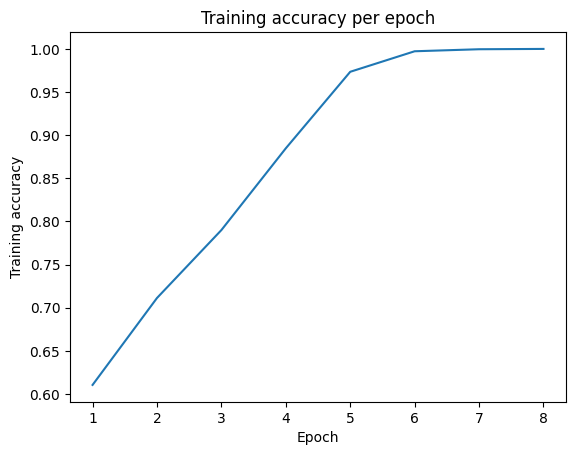

In [20]:
accuracies = [] # training accuracies
losses = []
eval_list = []
best_val_accuracy = 0 

for epoch in range(num_epochs):
        print(f"Epoch {epoch + 1}/{num_epochs}")
        epoch_train_accs, train_loss = train(model, train_dataloader, optimizer, scheduler, device)
        accuracy, report, cm = evaluate(model, val_dataloader, device)
        
        print(f"Validation Accuracy: {accuracy:.4f}")
        print(report)
        
        if accuracy > best_val_accuracy:
            best_val_accuracy = accuracy
            torch.save(model.state_dict(), "bert_classifier.pth")
        
        # if epoch == num_epochs - 1:    
        #    plot_confusion_matrix(cm, class_names=["Negative", "Neutral", "Positive"])
           
        accuracies.append(epoch_train_accs)
        losses.append(train_loss)
        eval_list.append((accuracy, report))
        
from matplotlib import pyplot as plt
v = torch.tensor(accuracies).flatten() 
plt.plot(torch.arange(1, len(v) + 1), v)
plt.xlabel("Epoch")
plt.ylabel("Training accuracy")
plt.title("Training accuracy per epoch")
plt.savefig('training_acc.png', bbox_inches='tight')


Test Accuracy: 0.6897175959449674
Test Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.79      0.67       541
           1       0.71      0.66      0.69      1293
           2       0.75      0.67      0.71       928

    accuracy                           0.69      2762
   macro avg       0.68      0.71      0.69      2762
weighted avg       0.70      0.69      0.69      2762



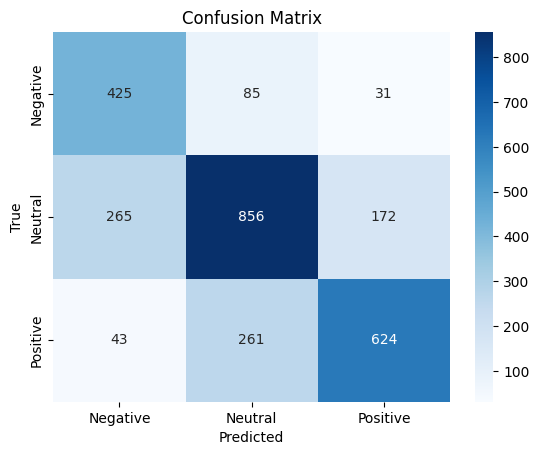

<Figure size 640x480 with 0 Axes>

In [21]:
def plot_confusion_matrix(cm, class_names):
    #plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()


model.load_state_dict(torch.load("bert_classifier.pth"))

test_acc, test_report, test_cm = evaluate(model, test_dataloader, device)
print("Test Accuracy:", test_acc)
print("Test Classification Report:\n", test_report)
plot_confusion_matrix(test_cm, class_names=["Negative", "Neutral", "Positive"])
plt.savefig('cm.png', bbox_inches='tight')

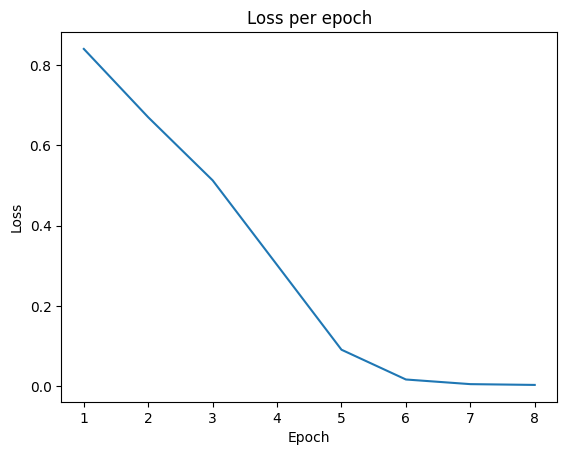

In [22]:
from matplotlib import pyplot as plt
v = torch.tensor(losses).flatten()
plt.plot(torch.arange(1, len(v) + 1), v)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss per epoch")
plt.savefig('loss.png', bbox_inches='tight')

In [ ]:
# Print the inccorrect classified entries
import torch
from sklearn.metrics import classification_report

model.eval()
all_preds = []
all_labels = []
all_texts = []
all_index = []

with torch.no_grad():
    for batch in test_dataloader:
        inputs = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)
        
        outputs = model(input_ids=inputs, attention_mask=attention_mask)
        logits = outputs.logits
        
        preds = torch.argmax(logits, dim=1)
        
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        all_texts.extend(batch['text'])
        all_index.extend(batch['index'])


errors = []
for text, pred, label, index in zip(all_texts, all_preds, all_labels, all_index):
    if pred != label:
        errors.append({
            "text": text,
            "true_label": label,
            "predicted_label": pred,
            "index": index
        })

for error in errors:  
    print(f"Text: {error['text']}")
    print(f"True Label: {error['true_label']} | Predicted Label: {error['predicted_label']} | Index: {error['index']}\n")


Text: in 8th grade i hid 200 in a lady gaga cd and didn't find it again until sophomore year so i felt like lady gaga had paid me
True Label: 2 | Predicted Label: 1 | Index: 2

Text: kane's teasing us with this shearer thing. triple backflip into the corner flag at the stadium of light on sunday
True Label: 1 | Predicted Label: 2 | Index: 3

Text: just got back. heading back to the gorge for foo fighters on friday
True Label: 2 | Predicted Label: 1 | Index: 6

Text: does it burn right now? yeah. harvey tomorrow, degrom game 6 and thor in game 7 with everyone available.
True Label: 2 | Predicted Label: 1 | Index: 13

Text: don't know the order, but top 3 albums are from kendrick, the weeknd amp bieber taylor swift 4th
True Label: 2 | Predicted Label: 1 | Index: 20

Text: kendrick lamar released black friday approximately 6 days ago i have listened to it precisely 10485839193847 times since then
True Label: 2 | Predicted Label: 1 | Index: 23

Text: why am i just learning that kim kardash

In [35]:
# Test sentiment prediction
test_text = "I am gonna buy milk"
sentiment = predict_sentiment(test_text, model, tokenizer, device)
print(test_text)
print(f"Predicted sentiment: {sentiment}")

I am gonna buy milk
Predicted sentiment: neutral


In [ ]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import f1_score
rfclf = RandomForestClassifier()
mnbclf = MultinomialNB()
lrclf = LogisticRegression(max_iter=1200, tol=1e-5, warm_start=True)
svcclf = SVC()

cv = CountVectorizer()

#batch = next(iter(train_dataloader))
#val = next(iter(val_dataloader))

Xtrain_encoded = cv.fit_transform(Xtrain)
Xtest_encoded = cv.transform(Xtest)


## Used for testing the tokenizer with classic methods
# Xtrain_encoded = batch["input_ids"].numpy()
# Xtest_encoded = val["input_ids"].numpy()

# Ytrain = batch["label"].numpy()
# Ytest = val["label"].numpy()


In [ ]:

#batch["input_ids"].numpy()
# batch["label"].numpy()


In [29]:
cross_val_score(mnbclf, Xtrain_encoded, Ytrain)

mnbclf.fit(Xtrain_encoded, Ytrain)
Yguess = mnbclf.predict(Xtest_encoded)
print(accuracy_score(Ytest, Yguess))
f1_score(Ytest, Yguess, average="weighted")

0.6310644460535844


0.6317040478856748

In [30]:
cross_val_score(rfclf, Xtrain_encoded, Ytrain)

rfclf.fit(Xtrain_encoded, Ytrain)
Yguess = rfclf.predict(Xtest_encoded)
print(accuracy_score(Ytest, Yguess))
f1_score(Ytest, Yguess, average="weighted")

0.5926864590876176


0.5805879848067478

In [31]:
#Xtrain_encoded[0].toarray()[0, :50]

In [33]:
cross_val_score(lrclf, Xtrain_encoded, Ytrain)

lrclf.fit(Xtrain_encoded, Ytrain)
Yguess = lrclf.predict(Xtest_encoded)
print(accuracy_score(Ytest, Yguess))
f1_score(Ytest,Yguess, average="weighted")

0.6202027516292542


0.6187862031199349